Kyle Shannon - 22 NOV 2015 - I decided to use the 2<sup>nd</sup> version dataset [with extra data points and variables] to complete this project.

### Section 0: References 
At End of Document

### Section 1: Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

There is a statistically significant difference in NYC Subway ridership during rainy and non rainy days. Formally:

-  H<sub>0</sub>: &mu;<sub>nonRainy</sub> = &mu;<sub>Rainy</sub> 
-  H<sub>a</sub>: &mu;<sub>nonRainy</sub> &#8800; &mu;<sub>Rainy</sub> 


 | &mu; | Refers to 
--- | ---
nonRainy | 1845.539 | Data from Figure 1
Rainy | 2028.196 | Data from Figure 2

The null hypothesis states that there is no mean significant change in subway ridership between rainy and non rainy days. The alternative hypothesis states that there is a statistically significant difference in means. Therefore this will be a *two tailed test*. 

<img src="Figure 1.png" alt="inline" style="width: 400px; float:left;"/><img src="Figure 2.png" alt="inline" style="width: 380px; float:left;"/>

Results from Mann Whitney U test:

#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

Because the distributions in Both Figure 1 and 2 are not normal, rather right-tailed skewed it would not be appropriate to use a t-test when comparing means. Instead the Mann-Whitney U test was used. 

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

#### 1.4 What is the significance and interpretation of these results?

### Relevant Code:

In [74]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats
import sklearn
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import formatter


In [2]:
df = pd.read_csv('turnstile_weather_v2.csv') #import csv into pandas.dataframe

In [11]:
df.info() #gathering general info about data, including counts, dtypes(), nulls, and col names.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42649 entries, 0 to 42648
Data columns (total 27 columns):
UNIT               42649 non-null object
DATEn              42649 non-null object
TIMEn              42649 non-null object
ENTRIESn           42649 non-null int64
EXITSn             42649 non-null int64
ENTRIESn_hourly    42649 non-null float64
EXITSn_hourly      42649 non-null float64
datetime           42649 non-null object
hour               42649 non-null int64
day_week           42649 non-null int64
weekday            42649 non-null int64
station            42649 non-null object
latitude           42649 non-null float64
longitude          42649 non-null float64
conds              42649 non-null object
fog                42649 non-null int64
precipi            42649 non-null float64
pressurei          42649 non-null float64
rain               42649 non-null int64
tempi              42649 non-null float64
wspdi              42649 non-null float64
meanprecipi        42649 non-

In [3]:
df.describe() #gathering general statistical info about data.

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [4]:
print df['rain'].value_counts() #using value_counts to glean more info about particular columns of data.

0    33064
1     9585
Name: rain, dtype: int64


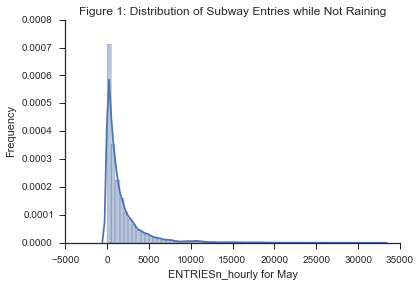

In [96]:
#Figure 1
sns.set_style("ticks")
figure_1 = sns.distplot(df['ENTRIESn_hourly'][df['rain']==0], bins=range(0,30001,500))
figure_1.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', yticks=np.arange(0.0000,0.0009,0.0001), 
             title="Figure 1: Distribution of Subway Entries while Not Raining")
sns.despine()
plt.show()

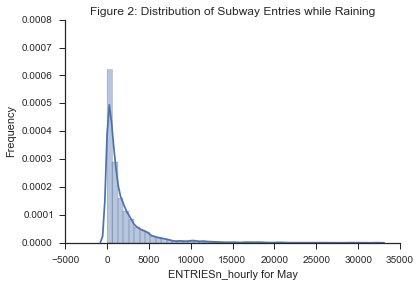

In [95]:
#Figure 2
sns.set_style("ticks")
figure_2 = sns.distplot(df['ENTRIESn_hourly'][df['rain']==1])
figure_2.set(ylabel="Frequency", xlabel='ENTRIESn_hourly for May', yticks=np.arange(0.0000,0.0009,0.0001),
             title="Figure 2: Distribution of Subway Entries while Raining")
sns.despine()
plt.show()

In [90]:
print 'Non Rainy Days: '
print df['ENTRIESn_hourly'][df['rain']==0].describe()

Non Rainy Days: 
count    33064.000000
mean      1845.539439
std       2878.770848
min          0.000000
25%        269.000000
50%        893.000000
75%       2197.000000
max      32814.000000
Name: ENTRIESn_hourly, dtype: float64


In [91]:
print 'Rainy Days: '
print df['ENTRIESn_hourly'][df['rain']==1].describe()

Rainy Days: 
count     9585.000000
mean      2028.196035
std       3189.433373
min          0.000000
25%        295.000000
50%        939.000000
75%       2424.000000
max      32289.000000
Name: ENTRIESn_hourly, dtype: float64


In [94]:
#MannWhitney U test
non_rainy = df['ENTRIESn_hourly'][df['rain']==0]
rainy = df['ENTRIESn_hourly'][df['rain']==1]
statistic, pvalue = scipy.stats.mannwhitneyu(non_rainy, rainy)
print 'Test Statistic: ', statistic
print 'p value: ', pvalue*2 #pvalue*2 for 2 sided test.

Test Statistic:  153635120.5
p value:  5.48213914249e-06


/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


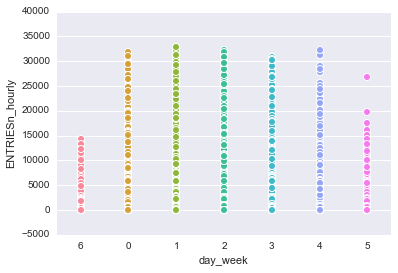

In [10]:
sns.stripplot(x="day_week", y="ENTRIESn_hourly", data=df)

In [38]:
#Shapiro test not good for large sample size. Perhaps we can randomly sub sample and rerun, or use the darling test?
scipy.stats.shapiro(df['ENTRIESn_hourly'][df['rain']==1])

/Applications/anaconda/lib/python2.7/site-packages/scipy/stats/morestats.py:1082: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.5938820838928223, 0.0)

In [ ]:
|